<a href="https://colab.research.google.com/github/egarmir/TFM_LastMile_Pulse/blob/main/TFM_LastMile_B2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Carga del dataset desde HuggingFace**

El subdataset LaDe-D (Last-mile Delivery) proporciona información espacio-temporal detallada de entregas de última milla, lo que permite analizar la trazabilidad completa del pedido desde la aceptación por parte del transportista hasta la entrega final al cliente, identificando patrones de retraso y cuellos de botella a nivel urbano.

In [1]:
!pip install -U datasets pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.2/515.2 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas=

In [2]:
#En LaDe, los CSV NO están en la raíz directa del repo accesible por load_dataset como archivos sueltos, porque el dataset usa un script de carga interno.
from datasets import load_dataset

dataset = load_dataset(
    "cainiao-ai/LaDe",
    data_dir="delivery"
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

delivery/delivery_cq.csv:   0%|          | 0.00/145M [00:00<?, ?B/s]

delivery/delivery_hz.csv:   0%|          | 0.00/287M [00:00<?, ?B/s]

delivery_jl.csv: 0.00B [00:00, ?B/s]

delivery/delivery_sh.csv:   0%|          | 0.00/228M [00:00<?, ?B/s]

delivery/delivery_yt.csv:   0%|          | 0.00/31.5M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [3]:
import pandas as pd

df = dataset["train"].to_pandas()


In [4]:
# Nos quedamos solo con Shanghai y Chongqing
cities_selected = ["Shanghai", "Chongqing"]
df = df[df["city"].isin(cities_selected)]

df["city"].value_counts()

city
Shanghai     1483864
Chongqing     931351
Name: count, dtype: int64

In [5]:
df = df.reset_index(drop=True)
df["city"] = df["city"].astype("category")

### **Comprensión del Dataset**

In [6]:
# Número de filas y columnas
print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (2415215, 17)


In [7]:
# Infromación general del dataset
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 2415215 entries, 0 to 2415214
Data columns (total 17 columns):
 #   Column             Dtype   
---  ------             -----   
 0   order_id           int64   
 1   region_id          int64   
 2   city               category
 3   courier_id         int64   
 4   lng                float64 
 5   lat                float64 
 6   aoi_id             int64   
 7   aoi_type           int64   
 8   accept_time        str     
 9   accept_gps_time    str     
 10  accept_gps_lng     float64 
 11  accept_gps_lat     float64 
 12  delivery_time      str     
 13  delivery_gps_time  str     
 14  delivery_gps_lng   float64 
 15  delivery_gps_lat   float64 
 16  ds                 int64   
dtypes: category(1), float64(6), int64(6), str(4)
memory usage: 427.3 MB


In [8]:
# Primer vistazo de las primeras filas
df.head()

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,2031782,10,Chongqing,73,108.71571,30.90228,50,14,10-22 10:26:00,10-22 10:26:00,108.71826,30.95587,10-22 17:04:00,10-22 17:04:00,108.66361,30.96702,1022
1,4285071,10,Chongqing,3605,108.71639,30.90269,50,14,09-07 10:13:00,09-07 10:13:00,108.71791,30.95635,09-09 15:44:00,09-09 15:44:00,108.71644,30.90266,907
2,4056800,10,Chongqing,3605,108.71645,30.90259,50,14,06-26 09:49:00,06-26 09:49:00,108.71798,30.95635,06-27 16:03:00,06-27 16:03:00,108.71647,30.90251,626
3,3589481,10,Chongqing,3605,108.71650,30.90347,50,14,09-11 11:01:00,09-11 11:01:00,108.71823,30.95596,09-13 17:14:00,09-13 17:14:00,108.71650,30.90341,911
4,2752329,10,Chongqing,3605,108.71608,30.90409,50,14,10-01 09:52:00,10-01 09:52:00,108.71820,30.95598,10-01 18:30:00,10-01 18:30:00,108.71413,30.90397,1001


### **Observaciones Iniciales**:

*Variables categóricas*
*  City: ciudad donde ocurre el envío - nominal

*Variables categóricas codificadas como numéricas*: son identificadores sin significado matemático
* region_id
* courier_id
* aoi_id
* aoi_type

*Varibles temporales a transformar:*
* accept_time -> pasar a datetime
* accept_gps_time-> pasar a datetime
* delivery time -> pasar a datetime
* delivery_gps_time -> pasar a datetime

*Variables que aportan poca información:*
* order_id -> se conserva solo como identificador

*Información duplicada:*
* ds -> deriva de delivery_time

In [9]:
#Convertir columnas a datetime

default_year = '2022'

def parse_datetime(col):
    return pd.to_datetime(default_year + '-' + col.astype(str),
                          format='%Y-%m-%d %H:%M:%S',
                          errors='coerce')

df['accept_time'] = parse_datetime(df['accept_time'])
df['delivery_time'] = parse_datetime(df['delivery_time'])
df['accept_gps_time'] = parse_datetime(df['accept_gps_time'])
df['delivery_gps_time'] = parse_datetime(df['delivery_gps_time'])

df['ds'] = pd.to_datetime(
    default_year + df['ds'].astype(str).str.zfill(4),
    format='%Y%m%d',
    errors='coerce'
)

df.head()


,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,2031782,10,Chongqing,73,108.71571,30.90228,50,14,2022-10-22 10:26:00,2022-10-22 10:26:00,108.71826,30.95587,2022-10-22 17:04:00,2022-10-22 17:04:00,108.66361,30.96702,2022-10-22
1,4285071,10,Chongqing,3605,108.71639,30.90269,50,14,2022-09-07 10:13:00,2022-09-07 10:13:00,108.71791,30.95635,2022-09-09 15:44:00,2022-09-09 15:44:00,108.71644,30.90266,2022-09-07
2,4056800,10,Chongqing,3605,108.71645,30.90259,50,14,2022-06-26 09:49:00,2022-06-26 09:49:00,108.71798,30.95635,2022-06-27 16:03:00,2022-06-27 16:03:00,108.71647,30.90251,2022-06-26
3,3589481,10,Chongqing,3605,108.71650,30.90347,50,14,2022-09-11 11:01:00,2022-09-11 11:01:00,108.71823,30.95596,2022-09-13 17:14:00,2022-09-13 17:14:00,108.71650,30.90341,2022-09-11
4,2752329,10,Chongqing,3605,108.71608,30.90409,50,14,2022-10-01 09:52:00,2022-10-01 09:52:00,108.71820,30.95598,2022-10-01 18:30:00,2022-10-01 18:30:00,108.71413,30.90397,2022-10-01


In [10]:
import numpy as np

# Estadísticos clave para variables numéricas
df.describe(include=np.number)

,order_id,region_id,courier_id,lng,lat,aoi_id,aoi_type,accept_gps_lng,accept_gps_lat,delivery_gps_lng,delivery_gps_lat
count,2.415215e+06,2.415215e+06,2.415215e+06,2.415215e+06,2.415215e+06,2.415215e+06,2.415215e+06,2.415215e+06,2.415215e+06,2.415215e+06,2.415215e+06
mean,2.257553e+06,7.438717e+01,2.428996e+03,1.157186e+02,3.058471e+01,3.020338e+04,3.664961e+00,1.157191e+02,3.058287e+01,1.157123e+02,3.058321e+01
std,1.303216e+06,4.891647e+01,1.381471e+03,7.266528e+00,7.887212e-01,1.720157e+04,5.100700e+00,7.266073e+00,7.878212e-01,7.310486e+00,8.167439e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,1.020849e+02,2.669903e+01,0.000000e+00,0.000000e+00,1.056279e+02,2.904341e+01,-9.000000e-05,-9.000000e-05
25%,1.129362e+06,3.700000e+01,1.289000e+03,1.065485e+02,2.960390e+01,1.533000e+04,1.000000e+00,1.065528e+02,2.959230e+01,1.065486e+02,2.960379e+01
50%,2.257412e+06,6.900000e+01,2.376000e+03,1.213655e+02,3.112120e+01,3.036200e+04,1.000000e+00,1.213695e+02,3.112140e+01,1.213648e+02,3.112084e+01
75%,3.386234e+06,1.100000e+02,3.622000e+03,1.215137e+02,3.122594e+01,4.477100e+04,2.000000e+00,1.215174e+02,3.121668e+01,1.215138e+02,3.122587e+01
max,4.514656e+06,1.660000e+02,4.874000e+03,1.219547e+02,3.991198e+01,6.014800e+04,1.500000e+01,1.218647e+02,3.141069e+01,1.219749e+02,3.991199e+01


**Observaciones en Variables Numéricas:**

* Order_id -> identificador sin valor análitico

  Mínimo: 0 posible valor inválido -> pedido no identificado
  
* courier_id -> identificador técnico

  Mínimo: 0 posible valor inválido -> courier no identificados

* aoid_ id

  Mínimo: 0 -> probablemnte indica sin AOI asignado -> ver cuántos registros supone para decidir cómo tratarlo

* region_id

  Rango = 1–166 → número finito de regiones.

  Media ≈ 74 → no interpretable (variable categórica).


* lng

  Rango ≈ 102.08–121.95 → válido para longitudes en China.

  Media ≈ 115.7

* lat

  Rango ≈ 26.7–39.9 → válido para latitudes en China.

  Media ≈ 30.6

* accept_gps_lng ->

  Rango ≈ 105.6 - 121.86 → válido.

  Muy similar a lng → consistencia espacial.

* accept_gps_lat

  Rango ≈ 29.0 - 31.4 → válido.

  Desviación pequeña → precisión razonable.

* delivery_gps_lang

  Mínimo ≈ -0.00009 → valor inválido.

  Resto del rango consistente con el área geográfica.

* delivery_gps_lat

   Mínimo: -0,00009 -> valor inválido

* aoi_type

  Mínimo: 0 -> sospechoso de ser inválido



In [11]:
time_cols = ['accept_time', 'accept_gps_time', 'delivery_time', 'delivery_gps_time', 'ds']

# Contar nulos por columna
nulos = df[time_cols].isna().sum()
print("Valores nulos por columna:\n", nulos)

# Rango mínimo y máximo por columna
rango = df[time_cols].agg(['min','max'])
print("Rango temporal por columna:\n", rango)

# Registros sin sentido: aceptación después de entrega
invalid_order = df[
    (df['accept_time'] > df['delivery_time']) |
    (df['accept_gps_time'] > df['delivery_gps_time'])
]

print(f"Número de registros con orden temporal inválido: {len(invalid_order)}")

Valores nulos por columna:
 accept_time          0
accept_gps_time      0
delivery_time        0
delivery_gps_time    0
ds                   0
dtype: int64
Rango temporal por columna:
             accept_time     accept_gps_time       delivery_time  \
min 2022-05-01 06:11:00 2022-05-01 06:11:00 2022-01-11 19:20:00   
max 2022-12-08 12:10:00 2022-12-08 12:10:00 2022-12-31 21:03:00   

      delivery_gps_time         ds  
min 2022-01-11 19:20:00 2022-05-01  
max 2022-12-31 21:03:00 2022-10-31  
Número de registros con orden temporal inválido: 3


**Análisis Descriptivo de Variables Temporales**

accept_time

* Valores nulos = 0 → todos los pedidos tienen hora de aceptación registrada.

* Rango = 2022-05-01 06:11:00 → 2022-12-08 12:10:00 → coherente con el periodo del dataset.

accept_gps_time

* Valores nulos = 0 → todas las coordenadas GPS de aceptación registradas.

* Rango = 2022-05-01 06:11:00 → 2022-12-08 12:10:00 → consistente con accept_time.

delivery_time

* Valores nulos = 0 → todas las entregas tienen hora registrada.

* Rango = 2022-01-11 19:20:00 → 2022-12-31 21:03:00

delivery_gps_time

* Valores nulos = 0

* Rango = 2022-01-11 19:20:00 → 2022-12-31 21:03:00 → coherente con delivery_time.

ds -> se eliminará, misma infromación que delivery_time


Registros con orden temporal inválido: 3 → extremadamente bajo

*Interpretación:* solo unos pocos registros tienen aceptación posterior a la entrega o GPS fuera de secuencia. Se eliminarán

### **Exploración y Calidad del Dato**

In [12]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

order_id             0.0
region_id            0.0
city                 0.0
courier_id           0.0
lng                  0.0
lat                  0.0
aoi_id               0.0
aoi_type             0.0
accept_time          0.0
accept_gps_time      0.0
accept_gps_lng       0.0
accept_gps_lat       0.0
delivery_time        0.0
delivery_gps_time    0.0
delivery_gps_lng     0.0
delivery_gps_lat     0.0
ds                   0.0
dtype: float64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.nunique(dropna=False)

order_id             2415215
region_id                 99
city                       2
courier_id              3226
lng                   151076
lat                   126653
aoi_id                 33014
aoi_type                  16
accept_time           144281
accept_gps_time       144281
accept_gps_lng          2693
accept_gps_lat          2710
delivery_time         164846
delivery_gps_time     164846
delivery_gps_lng      155872
delivery_gps_lat      129160
ds                       184
dtype: int64

In [15]:
df['delivery_duration_min'] = (
    df['delivery_time'] - df['accept_time']
).dt.total_seconds() / 60


**Observaciones**

En última milla B2C, la métrica operativa más relevante no es solo si hay retraso, sino el tiempo real necesario para completar una entrega una vez que el pedido ha sido aceptado por el courier, por ello se crea *"delivery_duration_min"*.
Esta constituye la variable objetivo principal (target) del proyecto:

Esta nueva variable será posteriormente discretizada para definir niveles de riesgo de entrega (bajo, medio y alto) en el modelo de clasificación.

Dentro del segmento de alto riesgo, se utilizará como variable continua para predecir el retraso esperado (en minutos) mediante un modelo de regresión.

#### Tratamiento de inconsistencias temporales y valores no plausibles

In [16]:
# Conteo de valores 0 en columnas críticas de identificación
id_checks = {
    "Order ID = 0": (df['order_id'] == 0).sum(),
    "Courier ID = 0": (df['courier_id'] == 0).sum(),
    "AOI ID = 0": (df['aoi_id'] == 0).sum(),
    "AOI Type = 0": (df['aoi_type'] == 0).sum()
}

for k, v in id_checks.items():
    print(f"{k}: {v} registros ({(v/len(df)*100):.4f}%)")

Order ID = 0: 1 registros (0.0000%)
Courier ID = 0: 17 registros (0.0007%)
AOI ID = 0: 203 registros (0.0084%)
AOI Type = 0: 75417 registros (3.1226%)


In [17]:
# Filtro de identificadores y tipos de área
df_saneado= df[
    (df['order_id'] != 0) &
    (df['courier_id'] != 0) &
    (df['aoi_id'] != 0) &
    (df['aoi_type'] != 0)
].copy()

print(f"Reducción total: {len(df) - len(df_saneado)} registros eliminados.")
print(f"Dataset final para modelado: {len(df_saneado)} registros.")

Reducción total: 75637 registros eliminados.
Dataset final para modelado: 2339578 registros.


In [18]:
# Exploración de la nueva variable delivery_duration
print(f"Valores negativos: {(df_saneado['delivery_duration_min'] < 0).sum()}")

print(df_saneado['delivery_duration_min'].describe())

Valores negativos: 3
count    2.339578e+06
mean     1.892359e+02
std      8.646446e+02
min     -4.214170e+05
25%      5.200000e+01
50%      9.300000e+01
75%      1.740000e+02
max      1.286300e+05
Name: delivery_duration_min, dtype: float64


Se realiza una limpieza de valores extremos en *delivery_duration_min* con el objetivo de eliminar observaciones no plausibles desde el punto de vista operativo y reducir la distorsión estadística.

In [19]:
# Informe de calidad sobre datos brutos
print("Diagnóstico de inconsistencias en datos brutos:")
inconsistencias = {
    "Duración < 2 min": (df_saneado['delivery_duration_min'] < 2).sum(),
    "Duración > 480 min": (df_saneado['delivery_duration_min'] > 480).sum(),
}

for k, v in inconsistencias.items():
    print(f"{k}: {v} registros")

Diagnóstico de inconsistencias en datos brutos:
Duración < 2 min: 17822 registros
Duración > 480 min: 129930 registros


In [20]:
# Definimos límites lógicos
lower_limit = 2  # Un pedido de menos de 2 min suele ser un error de click
upper_limit = 480 #establecemos lim superior

df_final = df_saneado[
    (df['delivery_duration_min'] >= lower_limit) &
    (df['delivery_duration_min'] <= upper_limit)
].copy()

print(f"Registros originales: {len(df)}")
print(f"Registros tras limpieza: {len(df_final)}")

/tmp/ipython-input-2457849927.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_final = df_saneado[


Registros originales: 2415215
Registros tras limpieza: 2191826


In [21]:
df_final.shape
df_final.info()

<class 'pandas.DataFrame'>
Index: 2191826 entries, 0 to 2415214
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   order_id               int64         
 1   region_id              int64         
 2   city                   category      
 3   courier_id             int64         
 4   lng                    float64       
 5   lat                    float64       
 6   aoi_id                 int64         
 7   aoi_type               int64         
 8   accept_time            datetime64[us]
 9   accept_gps_time        datetime64[us]
 10  accept_gps_lng         float64       
 11  accept_gps_lat         float64       
 12  delivery_time          datetime64[us]
 13  delivery_gps_time      datetime64[us]
 14  delivery_gps_lng       float64       
 15  delivery_gps_lat       float64       
 16  ds                     datetime64[us]
 17  delivery_duration_min  float64       
dtypes: category(1), datetime64[us](5), flo

### **Feature Engineering**

En esta sección se generan nuevas variables explicativas a partir de la información original con el objetivo de capturar patrones temporales, espaciales y operativos que influyen en el riesgo de retraso en la última milla.

#### Variable Objetivo

Se define un umbral de entrega a tiempo de 90 minutos, que actúa como referencia para clasificar el riesgo y cuantificar el retraso. A partir de este umbral se crean dos variables objetivo:

* on_time_delivery: variable binaria para el modelo de clasificación, donde:

  1 indica entrega dentro del tiempo esperado.

  0 indica entrega con retraso.

* delivery_delay_min: variable continua -> mide el retraso en minutos cuando se supera el umbral definido

In [22]:
on_time_threshold = 90

# Riesgo 1 cuando el tiempo es mayor a 90
df_final['target_risk_delay'] = (df_final['delivery_duration_min'] > on_time_threshold).astype(int)

# El retraso son los minutos que están por encima de 90
df_final['target_delay_min'] = (
    df_final['delivery_duration_min'] - on_time_threshold
).clip(lower=0)

print("Distribución de Riesgo (1 = Retraso, 0 = A tiempo):")
print(df_final['target_risk_delay'].value_counts(normalize=True) * 100)

print("\nEstadísticos de los que SÍ tienen retraso:")
display(df_final[df_final['target_risk_delay'] == 1]['target_delay_min'].describe())

Distribución de Riesgo (1 = Retraso, 0 = A tiempo):
target_risk_delay
0    51.144616
1    48.855384
Name: proportion, dtype: float64

Estadísticos de los que SÍ tienen retraso:


count    1.070825e+06
mean     9.598319e+01
std      8.909080e+01
min      1.000000e+00
25%      2.700000e+01
50%      6.700000e+01
75%      1.390000e+02
max      3.900000e+02
Name: target_delay_min, dtype: float64

#### Indicadores de rendimeinto histórico

Una vez definidas las variables objetivo, se procedió a extraer el perfil de comportamiento histórico de cada repartidor, transformando el identificador courier_id en un predictor de rendimiento

In [23]:
#Media histórica de retraso por courier
df_final['courier_mean_delay'] = (
    df_final.groupby('courier_id')['target_delay_min']
    .transform('mean')
)

#Volumen historico del courier
df_final['courier_volume'] = (
    df_final.groupby('courier_id')['target_delay_min']
    .transform('count')
)

#Tasa de cumplimiento del SLA
df_final['courier_sla_rate'] = (
    df_final.groupby('courier_id')['target_risk_delay']
    .transform('mean')
)

#### Variables temporales derivadas

El momento en el que un pedido es aceptado por el repartidor tiene un impacto directo en la duración de la entrega, debido a factores como congestión urbana, patrones de demanda y disponibilidad de couriers. A partir de la variable accept_time, se derivan los siguientes componentes temporales:

* Hora del día (hour)

* Día de la semana (day_of_week)

* ndicador de fin de semana (is_weekend),

* Horas punta (is_peak_hour)-> franjas horarias con mayor congestión urbana

In [24]:
# Componentes temporales clave
df_final['hour'] = df_final['accept_time'].dt.hour
df_final['day_of_week'] = df_final['accept_time'].dt.dayofweek
df_final['is_weekend'] = (df_final['day_of_week'] >= 5).astype(int)

# Horas punta (proxy de congestión urbana)
df_final['is_peak_hour'] = df_final['hour'].between(7, 9) | df_final['hour'].between(17, 20)
df_final['is_peak_hour'] = df_final['is_peak_hour'].astype(int)


#### Variables espaciales y estructurales

---



Para capturar el efecto de la distancia recorrida, se calcula la distancia geográfica en kilómetros entre el punto donde el courier acepta el pedido y el punto de entrega final.

Dado que las coordenadas están expresadas en latitud y longitud, se utiliza la fórmula de **Haversine**

In [25]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1-a))

df_final['distance_km'] = haversine(
    df_final['accept_gps_lat'], df_final['accept_gps_lng'],
    df_final['delivery_gps_lat'], df_final['delivery_gps_lng']
)

df_final['aoi_type'] = df_final['aoi_type'].astype('category')

df_final['distance_km'].describe()

count    2.191826e+06
mean     2.823216e+00
std      7.232908e+01
min      0.000000e+00
25%      1.134916e+00
50%      1.899806e+00
75%      2.954979e+00
max      1.297656e+04
Name: distance_km, dtype: float64

In [26]:
print("Validación de Rangos de Negocio (Geográficos):")
total_regs = len(df_final)

checks = {
    "Distancia <= 0 km (Error GPS)": (df_final['distance_km'] <= 0).sum(),
    "Distancia > 50 km (Fuera de rango urbano)": (df_final['distance_km'] > 50).sum(),
}

for k, v in checks.items():
    porcentaje = (v / total_regs) * 100
    print(f"➢ {k}: {v} registros ({porcentaje:.4f}%)")

print(f"\nDistancia máxima detectada: {df_final['distance_km'].max():.2f} km")

Validación de Rangos de Negocio (Geográficos):
➢ Distancia <= 0 km (Error GPS): 3 registros (0.0001%)
➢ Distancia > 50 km (Fuera de rango urbano): 534 registros (0.0244%)

Distancia máxima detectada: 12976.56 km


In [27]:
# Registros eliminados
df_final2 = df_final[
    (df_final['distance_km'] > 0.1) &
    (df_final['distance_km'] < 50)
].copy()

print(f"➢ Registros iniciales: {len(df_final)}")
print(f"➢ Registros válidos: {len(df_final2)}")

➢ Registros iniciales: 2191826
➢ Registros válidos: 2160862


#### Variables de carga operativa

Se crean variables que capturan la presión operativa del sistema en el momento de la entrega, tanto a nivel de courier como de zona geográfica.

* **Carga diaria del courier** (*orders_by_courier*): número total de pedidos gestionados por un repartidor en un día determinado.

* **Congestión local** (*aoi_congestion*): número de pedidos en la misma área (AOI) y franja horaria, como proxy de saturación local.

In [28]:
# Carga diaria del courier
df_final2['orders_by_courier'] = (
    df_final2
    .groupby(['courier_id', 'ds'])['order_id']
    .transform('count')
)

# Congestión local por AOI y hora
df_final2['aoi_congestion'] = (
    df_final2
    .groupby(['aoi_id', 'ds', 'hour'])['order_id']
    .transform('count')
)

#### Preparación del dataset para modelado

In [29]:
# Se eliminan columnas no necesarias
cols_to_drop = [
    'order_id', 'aoi_id',
    'accept_time', 'delivery_time', 'ds',
    'accept_gps_lat', 'accept_gps_lng',
    'delivery_gps_lat', 'delivery_gps_lng'
]

df_eda = df_final2.drop(columns=cols_to_drop)


In [30]:
df_eda.dtypes

region_id                         int64
city                           category
courier_id                        int64
lng                             float64
lat                             float64
aoi_type                       category
accept_gps_time          datetime64[us]
delivery_gps_time        datetime64[us]
delivery_duration_min           float64
target_risk_delay                 int64
target_delay_min                float64
courier_mean_delay              float64
courier_volume                    int64
courier_sla_rate                float64
hour                              int32
day_of_week                       int32
is_weekend                        int64
is_peak_hour                      int64
distance_km                     float64
orders_by_courier                 int64
aoi_congestion                    int64
dtype: object

### **Análisis exploratio de datos (EDA)**

#### Análisis univariente

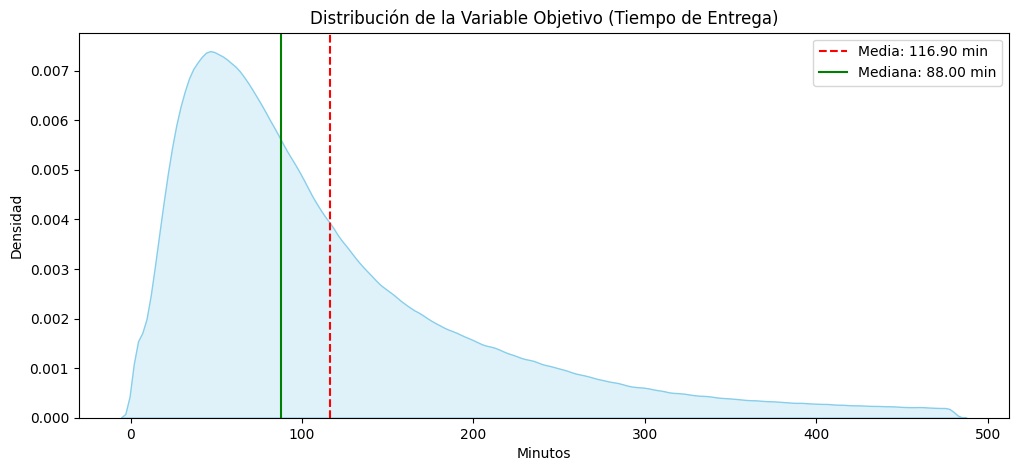

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Visualización de la distribución
sns.kdeplot(df_eda['delivery_duration_min'], fill=True, color="skyblue", bw_adjust=0.5)

# Líneas de referencia
plt.axvline(df_eda['delivery_duration_min'].mean(), color='red', linestyle='--', label=f"Media: {df_final['delivery_duration_min'].mean():.2f} min")
plt.axvline(df_eda['delivery_duration_min'].median(), color='green', linestyle='-', label=f"Mediana: {df_final['delivery_duration_min'].median():.2f} min")

plt.title("Distribución de la Variable Objetivo (Tiempo de Entrega)")
plt.xlabel("Minutos")
plt.ylabel("Densidad")
plt.legend()
plt.show()

#### Análisis bivariante y multivariante

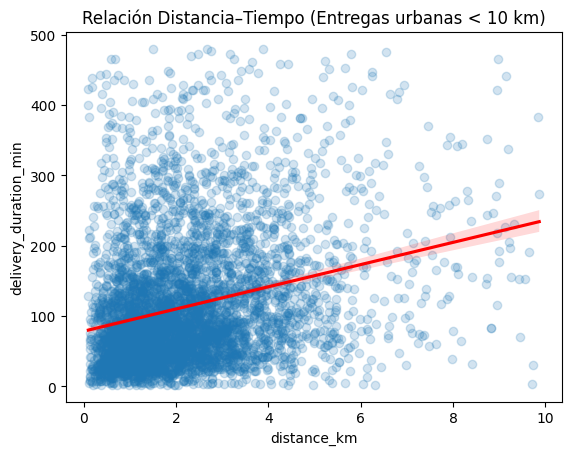

In [32]:
#Distancia vs tiempo
df_zoom = df_eda[df_eda['distance_km'] <= 10]

sns.regplot(
    data=df_zoom.sample(5000, random_state=42),
    x='distance_km',
    y='delivery_duration_min',
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'}
)
plt.title("Relación Distancia–Tiempo (Entregas urbanas < 10 km)")
plt.show()

/tmp/ipython-input-2676087697.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='distance_category', y='delivery_duration_min', data=df_plot, palette='Set3')


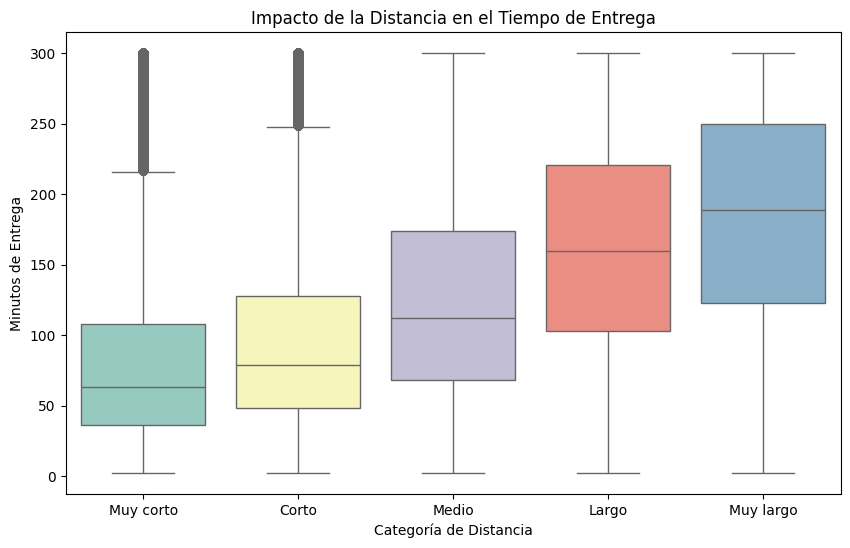

In [33]:
df_plot = df_eda[
    (df_eda['distance_km'] > 0) & (df_eda['distance_km'] <= 30) &
    (df_eda['delivery_duration_min'] > 0) & (df_eda['delivery_duration_min'] <= 300)
].copy()

df_plot['distance_category'] = pd.cut(
    df_plot['distance_km'],
    bins=[0, 1, 3, 7, 15, 30],
    labels=['Muy corto', 'Corto', 'Medio', 'Largo', 'Muy largo']
)

plt.figure(figsize=(10,6))
sns.boxplot(x='distance_category', y='delivery_duration_min', data=df_plot, palette='Set3')
plt.title("Impacto de la Distancia en el Tiempo de Entrega")
plt.xlabel("Categoría de Distancia")
plt.ylabel("Minutos de Entrega")
plt.show()

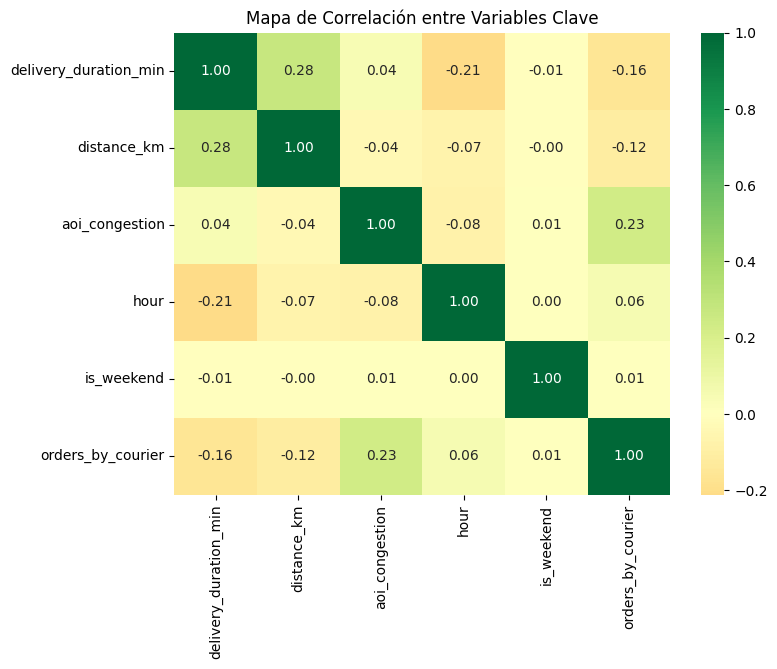

In [34]:
# Análisis de Correlación
columnas_modelo = [
    'delivery_duration_min',
    'distance_km',
    'aoi_congestion',
    'hour',
    'is_weekend',
    'orders_by_courier'
]

matriz_corr = df_eda[columnas_modelo].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_corr,
    annot=True,
    fmt=".2f",
    cmap='RdYlGn',
    center=0
)

plt.title("Mapa de Correlación entre Variables Clave")
plt.show()

#### Análisis Temporal

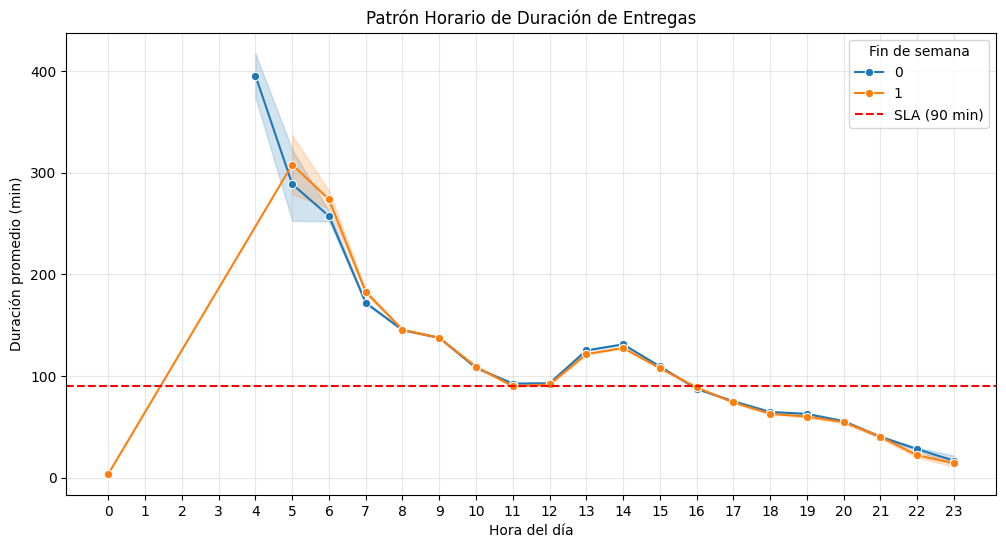

In [35]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_eda,
    x='hour',
    y='delivery_duration_min',
    hue='is_weekend',
    marker='o'
)

plt.axhline(
    90,
    color='red',
    linestyle='--',
    label='SLA (90 min)'
)

plt.xticks(range(0, 24))
plt.title("Patrón Horario de Duración de Entregas")
plt.xlabel("Hora del día")
plt.ylabel("Duración promedio (min)")
plt.legend(title="Fin de semana")
plt.grid(alpha=0.3)
plt.show()


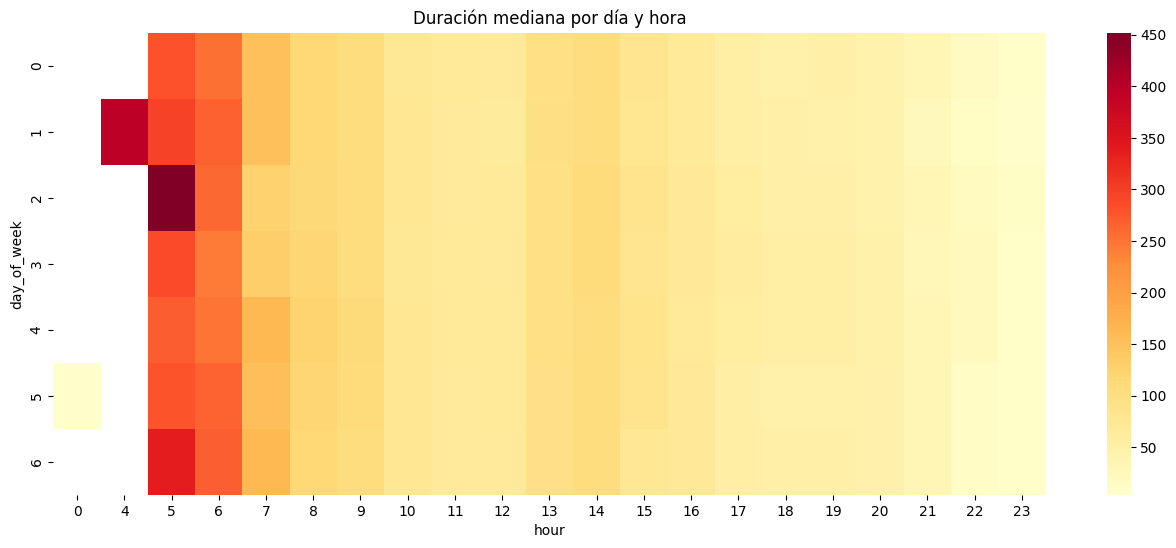

In [36]:
#Heatmap día-hora
pivot = df_eda.pivot_table(
    index='day_of_week',
    columns='hour',
    values='delivery_duration_min',
    aggfunc='median'
)
plt.figure(figsize=(16, 6))

sns.heatmap(pivot, cmap="YlOrRd")
plt.title("Duración mediana por día y hora")
plt.show()

### **Definición del problema de Machine Learning**

En última milla B2C hay dos decisiones distintas en momentos distintos:
 1. Antes de ejecutar la entrega - ¿riesgo de retraso?
 2. Cuando el retraso ya es probable - ¿cuánto impactará?

#### **Clasificación** (Deteccion del riesgo)

En la primera etapa se define un problema de clasificación binaria cuyo objetivo es identificar si una entrega superará o no el umbral de servicio establecido.

El objetivo es detectar entregas con alto riesgo de incumplir el SLA para lanzar alertas tempranas.

Ambos problemas están estrechamente relacionados, pero responden a objetivos distintos. Por este motivo, se construyen dos datasets específicos:

* Dataset de clasificación (*df_clf*): incluye todos los pedidos y se utiliza para detectar el riesgo de retraso.

* Dataset de regresión (*df_reg*): incluye únicamente los pedidos que efectivamente presentan retraso, y se utiliza para estimar su magnitud.

In [37]:
# Dataset específico para clasificación (todos los pedidos)
df_clf = df_eda.copy()

# Dataset específico para regresión (solo pedidos retrasados)
df_reg = df_eda[df_eda['target_risk_delay'] == 1].copy()

print(f"Pedidos totales (clasificación): {len(df_clf)}")
print(f"Pedidos retrasados (regresión): {len(df_reg)}")


Pedidos totales (clasificación): 2160862
Pedidos retrasados (regresión): 1053596


Antes de proceder al entrenamiento de los modelos, se realiza una validación final del dataset para asegurar su consistencia y adecuación al proceso de modelado.

Se definen explícitamente las variables predictoras, diferenciando entre variables numéricas y categóricas, y se verifica que todas presenten los tipos de datos esperados.

In [38]:
# Definimos las features
features_numericas = [
    'distance_km',
    'orders_by_courier',
    'aoi_congestion',
    'hour',
    'day_of_week',
    'is_weekend',
    'is_peak_hour',
    'courier_mean_delay',
    'courier_volume',
    'courier_sla_rate',

]

features_categoricas = ['aoi_type', 'region_id']

features = features_numericas + features_categoricas

print("Features finales numericas:", features_numericas)
print("Features finales categóricas:", features_categoricas)
print("\nTipos de datos:")
print(df_eda[features_numericas].dtypes)


Features finales numericas: ['distance_km', 'orders_by_courier', 'aoi_congestion', 'hour', 'day_of_week', 'is_weekend', 'is_peak_hour', 'courier_mean_delay', 'courier_volume', 'courier_sla_rate']
Features finales categóricas: ['aoi_type', 'region_id']

Tipos de datos:
distance_km           float64
orders_by_courier       int64
aoi_congestion          int64
hour                    int32
day_of_week             int32
is_weekend              int64
is_peak_hour            int64
courier_mean_delay    float64
courier_volume          int64
courier_sla_rate      float64
dtype: object


In [39]:
# Columnas clave para modelado

X = df_eda[features]
y_class = df_eda['target_risk_delay']
cols_check = features + ['target_risk_delay', 'target_delay_min']

print("Nulos por columna:")
print(df_eda[cols_check].isnull().sum())


Nulos por columna:
distance_km           0
orders_by_courier     0
aoi_congestion        0
hour                  0
day_of_week           0
is_weekend            0
is_peak_hour          0
courier_mean_delay    0
courier_volume        0
courier_sla_rate      0
aoi_type              0
region_id             0
target_risk_delay     0
target_delay_min      0
dtype: int64


In [40]:
print("\nRangos de variables numéricas:")
display(
    df_eda[
        ['delivery_duration_min', 'distance_km',
         'aoi_congestion', 'orders_by_courier']
    ].describe().round(2)
)



Rangos de variables numéricas:


,delivery_duration_min,distance_km,aoi_congestion,orders_by_courier
count,2160862.00,2160862.00,2160862.00,2160862.00
mean,116.57,2.37,3.43,25.52
std,92.75,2.07,3.40,12.06
min,2.00,0.10,1.00,1.00
25%,51.00,1.17,1.00,16.00
50%,88.00,1.92,2.00,25.00
75%,154.00,2.98,5.00,34.00
max,480.00,49.92,50.00,78.00


In [41]:
print("\nDistribución del target de clasificación (%):")
display(
    df_eda['target_risk_delay']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)


Distribución del target de clasificación (%):


target_risk_delay
0    51.24
1    48.76
Name: proportion, dtype: float64

In [42]:
print("\nDistribución del target de regresión (solo retrasos):")
display(
    df_eda[df_eda['target_risk_delay'] == 1]
    ['target_delay_min']
    .describe()
    .round(2)
)


Distribución del target de regresión (solo retrasos):


count    1053596.00
mean          95.41
std           88.73
min            1.00
25%           27.00
50%           67.00
75%          138.00
max          390.00
Name: target_delay_min, dtype: float64

### **Pipeline de Procesamiento y Entrenameinto**

#### Separación Train/Test y pipeline de preprocesamiento

In [43]:
from sklearn.model_selection import train_test_split

X = df_eda[features]
y_class = df_eda['target_risk_delay']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

Se define un preprocesador que:

 * Escala las variables numéricas con StandardScaler

 * Codifica variables categóricas con OneHotEncoder ignorando categorías desconocidas

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['aoi_type'])
    ]
)

# Pipeline final
final_pipeline_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', df_clf)
])

#### **Entrenamiento y Validación de modelos**

Para acelerar la experimentación, se submuestrea un conjunto representativo de 300k registros del entrenamiento:

* Clasificación: Logistic Regression, Random Forest, Gradient Boosting

* Regresión: Gradient Boosting Regressor, Random Forest Regressor

Se evalúan métricas relevantes:

* Clasificación → Accuracy, Precision, Recall, F1, ROC-AUC

* Regresión → MAE, RMSE, R²

Esta etapa permite comparar modelos rápidamente y decidir cuál entrenar con el dataset completo posteriormente.

#### Comparación Inicial entre modelos

Se han seleccionado tres arquitecturas con naturalezas matemáticas distintas para cubrir el espectro de aprendizaje:

Logistic Regression (Baseline): Un modelo lineal que permite evaluar la separabilidad simple de los datos. Sirve como referencia de complejidad mínima.

XGBoost (Extreme Gradient Boosting): Algoritmo basado en árboles de decisión con crecimiento por niveles (level-wise). Es el estándar de la industria por su capacidad de regularización y manejo de relaciones no lineales.

LightGBM (Light Gradient Boosting Machine): Optimizado para grandes volúmenes de datos mediante el crecimiento por hojas (leaf-wise). Su eficiencia en memoria y velocidad lo hacen el candidato ideal para despliegues en tiempo real en logística.

*MODELO DE CLASIFICACIÓN*

In [45]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time
import pandas as pd


In [46]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

ratio = (y_train == 0).sum() / (y_train == 1).sum()

pipelines = {
    'LogisticRegression': Pipeline([
        ('preprocess', preprocessor),
        ('model', LogisticRegression(
            max_iter=1000,
            class_weight='balanced',
            n_jobs=-1,
            random_state=42
        ))
    ]),
    'XGBoost': Pipeline([
        ('preprocess', preprocessor),
        ('model', XGBClassifier(
            n_estimators=200,
            max_depth=6,
            scale_pos_weight=ratio,
            learning_rate=0.1,
            n_jobs=-1,
            random_state=42
        ))
    ]),
    'LightGBM': Pipeline([
        ('preprocess', preprocessor),
        ('model', LGBMClassifier(
            n_estimators=500,
            learning_rate=0.05,
            scale_pos_weight=ratio,
            n_jobs=-1,
            random_state=42
        ))
    ])
}

Dada la magnitud del dataset original (approx 2.2 millones), el entrenamiento iterativo de múltiples modelos incurre en un alto coste computacional. Se ha optado por un Submuestreo Estratificado de $300,000$ observaciones.

In [47]:

#Submuestreo solo para comaprar los modelos (muestra representativa)
from sklearn.model_selection import train_test_split

# Sampleamos 300k registros manteniendo proporción de clases
X_sample, _, y_sample, _ = train_test_split(
    X_train,
    y_train,
    train_size=300_000,
    stratify=y_train,
    random_state=42
)


#### Métricas de Evaluación y Optimización del Negocio
El éxito del modelo no se mide solo por su capacidad de acierto general (Accuracy), sino por su eficiencia operativa.Coste de Error: En la operativa de LaDe, un Falso Positivo (predecir un retraso que no ocurre) implica un coste logístico innecesario.Métrica Primaria ($F_{0.5}$-Score): Se utiliza la métrica $F_{\beta}$ con un valor de $\beta = 0.5$.$$F_{\beta} = (1 + \beta^2) \cdot \frac{\text{precision} \cdot \text{recall}}{(\beta^2 \cdot \text{precision}) + \text{recall}}$$


Al fijar $\beta = 0.5$, se otorga mayor peso relativo a la Precisión que al Recall, penalizando más severamente las falsas alarmas que las omisiones, sin descuidar la detección de retrasos críticos (SLA).

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, fbeta_score
import time
import pandas as pd

results = []

for name, pipe in pipelines.items():
    print(f"Entrenando {name}...")
    start = time.time()

    # Entrenamos con la muestra de 300k
    pipe.fit(X_sample, y_sample)

    # Predicciones
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    end_time = round((time.time() - start) / 60, 2)

    # Calculamos F-beta (beta=0.5) para priorizar Precisión sobre Recall
    f05 = fbeta_score(y_test, y_pred, beta=0.5)

    results.append({
        'Model': name,
        'Time (min)': end_time,
        'AUC-ROC': roc_auc_score(y_test, y_proba),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'F0.5-Score (Prec-focused)': f05
    })

# Creamos el DataFrame y ordenamos por F0.5 para ver cuál es más "rentable"
df_results_cls = pd.DataFrame(results).sort_values(by='F0.5-Score (Prec-focused)', ascending=False)

print("\n--- RESULTADOS COMPARATIVOS ---")
display(df_results_cls)

Entrenando LogisticRegression...
Entrenando XGBoost...
Entrenando LightGBM...
[LightGBM] [Info] Number of positive: 146274, number of negative: 153726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.149092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 300000, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487580 -> initscore=-0.049690
[LightGBM] [Info] Start training from score -0.049690


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- RESULTADOS COMPARATIVOS ---


,Model,Time (min),AUC-ROC,Precision,Recall,F1-Score,F0.5-Score (Prec-focused)
2,LightGBM,0.55,0.808743,0.722388,0.735278,0.728776,0.724929
1,XGBoost,0.20,0.808194,0.722034,0.734822,0.728372,0.724556
0,LogisticRegression,0.08,0.785897,0.698358,0.738979,0.718095,0.706121


In [49]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Obtenemos las probabilidades del mejor modelo
y_scores = pipelines['LightGBM'].predict_proba(X_test)[:, 1]

# Calculamos precisiones y recalls
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Creamos un DataFrame para analizar los umbrales
df_thresholds = pd.DataFrame({
    'threshold': thresholds,
    'precision': precisions[:-1],
    'recall': recalls[:-1]
})

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [50]:
# Buscamos el umbral que nos de al menos un 64% de precisión
objetivo_precision = 0.64
umbral_ajustado = df_thresholds[df_thresholds['precision'] >= objetivo_precision]['threshold'].min()

print(f"Para obtener una precisión del {objetivo_precision*100}%, el umbral debe ser: {umbral_ajustado:.2f}")

# Ver qué recall nos queda con ese umbral
recall_resultante = df_thresholds[df_thresholds['threshold'] >= umbral_ajustado]['recall'].iloc[0]
print(f"Con este umbral, capturarás el {recall_resultante*100:.21f}% de los retrasos totales.")

Para obtener una precisión del 64.0%, el umbral debe ser: 0.34
Con este umbral, capturarás el 87.137372519801246539828% de los retrasos totales.


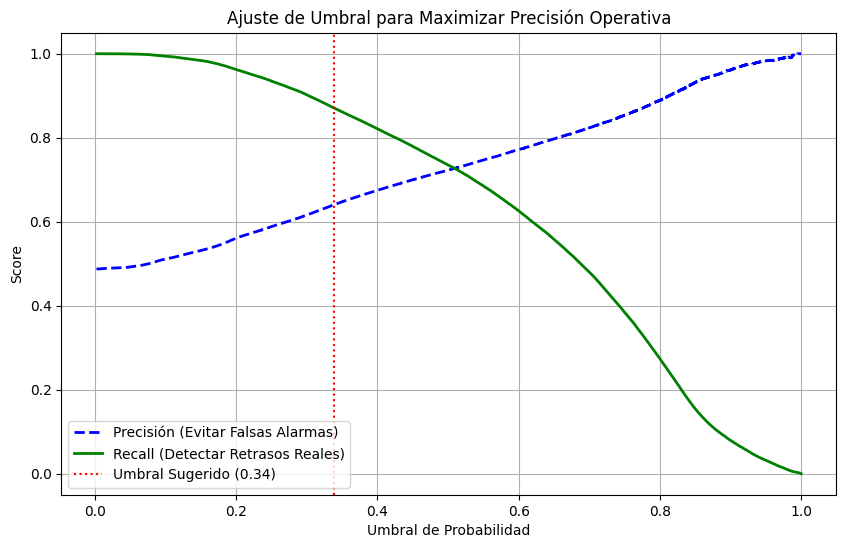

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precisión (Evitar Falsas Alarmas)', lw=2)
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall (Detectar Retrasos Reales)', lw=2)
plt.axvline(x=umbral_ajustado, color='red', linestyle=':', label=f'Umbral Sugerido ({umbral_ajustado:.2f})')
plt.xlabel('Umbral de Probabilidad')
plt.ylabel('Score')
plt.title('Ajuste de Umbral para Maximizar Precisión Operativa')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer, fbeta_score
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import time

# Scorer F0.5
f05_scorer = make_scorer(fbeta_score, beta=0.5)

# Split para Early Stopping (importante para validar cada iteración)
X_train_tune, X_val_tune, y_train_tune, y_val_tune = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    stratify=y_sample,
    random_state=42
)

# Parámetros
param_dist_lgbm = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 63, 127],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [20, 50, 100],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'scale_pos_weight': [ratio]
}

# Configuramos el modelo base
lgbm_base = LGBMClassifier(random_state=42, n_jobs=-1, verbosity=-1)

random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_base,
    param_distributions=param_dist_lgbm,
    n_iter=10,
    cv=3,
    scoring=f05_scorer,
    random_state=42,
    verbose=1
)

# 5Ejecución con FIT modificado
print("Iniciando búsqueda con Early Stopping...")
start = time.time()

random_search_lgbm.fit(
    X_train_tune, y_train_tune,
    eval_set=[(X_val_tune, y_val_tune)],
    eval_metric='binary_logloss',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=0) # Para que no ensucie la consola con cada árbol
    ]
)

duration = (time.time() - start) / 60
print(f"\n Tuning completado en {duration:.2f} minutos")
print(f"Mejores parámetros: {random_search_lgbm.best_params_}")


Iniciando búsqueda con Early Stopping...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[883]	valid_0's binary_logloss: 0.517403
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[811]	valid_0's binary_logloss: 0.516773
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[833]	valid_0's binary_logloss: 0.517183
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1070]	valid_0's binary_logloss: 0.515631
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1060]	valid_0's binary_logloss: 0.516288
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[978]	valid_0's binary_logloss: 0.516441
Training until validation scores don't improve for 50 rounds
Early stoppin

*MODELO DE REGRESIÓN*

In [53]:
from sklearn.model_selection import train_test_split

# Nos quedamos solo con pedidos retrasados
X_reg = df_reg[features]
y_reg = df_reg['target_delay_min']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg,
    y_reg,
    test_size=0.2,
    random_state=42
)


In [54]:
from sklearn.model_selection import train_test_split

# Submuestreo del conjunto de entrenamiento
X_train_reg_sample, _, y_train_reg_sample, _ = train_test_split(
    X_train_reg,
    y_train_reg,
    train_size=300_000,
    random_state=42
)


Se seleccionan algoritmos de Boosting (LightGBM y XGBoost) para la fase de regresión dada su superioridad previa en la clasificación. El objetivo es minimizar el MAE, alineándose con la necesidad de negocio de proporcionar una estimación de tiempo realista al cliente final, siendo esta métrica menos sensible a retrasos extremos atípicos que el RMSE."

In [55]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

pipelines_reg = {
    'LightGBM_Reg': Pipeline([
        ('preprocess', preprocessor),
        ('model', LGBMRegressor(
            n_estimators=500,
            learning_rate=0.05,
            num_leaves=63,
            random_state=42,
            n_jobs=-1
        ))
    ]),
    'XGBoost_Reg': Pipeline([
        ('preprocess', preprocessor),
        ('model', XGBRegressor(
            n_estimators=500,
            learning_rate=0.05,
            max_depth=6,
            random_state=42,
            n_jobs=-1
        ))
    ])
}


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import time

results_reg = []

for name, pipe in pipelines_reg.items():
    print(f"Executing Regression Benchmark: {name}...")
    start_time = time.time()

    # Entrenamiento sobre la muestra de registros con retraso real
    pipe.fit(X_train_reg_sample, y_train_reg_sample)

    # Predicción sobre el set de test de regresión
    y_pred = pipe.predict(X_test_reg)

    # Cálculo de métricas
    mae = mean_absolute_error(y_test_reg, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    r2 = r2_score(y_test_reg, y_pred)

    elapsed_time = (time.time() - start_time) / 60

    results_reg.append({
        'Model': name,
        'Time (min)': round(elapsed_time, 2),
        'MAE (Minutos)': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R2 Score': round(r2, 4)
    })

# Visualización de resultados ordenada por MAE
df_results_reg = pd.DataFrame(results_reg).sort_values('MAE (Minutos)')

# Añadimos una columna para entender el error relativo
mean_delay = y_test_reg.mean()
df_results_reg['Error Relativo %'] = round((df_results_reg['MAE (Minutos)'] / mean_delay) * 100, 2)

display(df_results_reg)


Executing Regression Benchmark: LightGBM_Reg...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Executing Regression Benchmark: XGBoost_Reg...


,Model,Time (min),MAE (Minutos),RMSE,R2 Score,Error Relativo %
0,LightGBM_Reg,0.32,56.11,74.91,0.2847,58.95
1,XGBoost_Reg,0.28,56.88,75.89,0.2660,59.76


In [57]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor, early_stopping, log_evaluation
import time

# Split para validación del Early Stopping
# Usamos el set de regresión que ya tenías filtrado
X_train_reg_tune, X_val_reg_tune, y_train_reg_tune, y_val_reg_tune = train_test_split(
    X_train_reg_sample, y_train_reg_sample,
    test_size=0.2,
    random_state=42
)

# Definir espacio de búsqueda
param_dist_lgbm_reg = {
    'model__n_estimators': [500, 1000, 1500],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__num_leaves': [31, 63, 127],
    'model__max_depth': [-1, 10, 20],
    'model__min_child_samples': [20, 50, 100],
    'model__reg_alpha': [0, 0.1, 0.5],
    'model__reg_lambda': [0, 0.1, 0.5]
}

# Configurar el RandomizedSearchCV
X_val_reg_prep = pipelines_reg['LightGBM_Reg'].named_steps['preprocess'].transform(X_val_reg_tune)

random_search_lgbm_reg = RandomizedSearchCV(
    pipelines_reg['LightGBM_Reg'],
    param_distributions=param_dist_lgbm_reg,
    n_iter=15,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=1,
    random_state=42,
    verbose=1
)

# Ejecución del Fit con lógica de early_stopping
print("Buscando mejores parámetros de regresión con Early Stopping...")
start = time.time()

random_search_lgbm_reg.fit(
    X_train_reg_tune, y_train_reg_tune,
    model__eval_set=[(X_val_reg_prep, y_val_reg_tune)],
    model__eval_metric='mae',
    model__callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=0)
    ]
)

print(f"\n Tuning de regresión completado en {(time.time() - start)/60:.2f} min")
print(f"Mejores parámetros: {random_search_lgbm_reg.best_params_}")

Buscando mejores parámetros de regresión con Early Stopping...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 54.836	valid_0's l2: 5487.04


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[995]	valid_0's l1: 55.0405	valid_0's l2: 5501.94


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 54.9243	valid_0's l2: 5510.71


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1498]	valid_0's l1: 54.4434	valid_0's l2: 5439.7


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1500]	valid_0's l1: 54.6245	valid_0's l2: 5454.16


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1499]	valid_0's l1: 54.5018	valid_0's l2: 5458.87


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1497]	valid_0's l1: 54.8063	valid_0's l2: 5488.7


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1500]	valid_0's l1: 54.8669	valid_0's l2: 5480.64


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1500]	valid_0's l1: 54.8087	valid_0's l2: 5499.53


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 55.7877	valid_0's l2: 5621.24


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 56.0001	valid_0's l2: 5635.95


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 55.8238	valid_0's l2: 5628.52


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 54.9861	valid_0's l2: 5518.14


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 55.1227	valid_0's l2: 5524.97


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 55.0968	valid_0's l2: 5543.83


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1500]	valid_0's l1: 54.8549	valid_0's l2: 5513.28


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1500]	valid_0's l1: 54.9414	valid_0's l2: 5510.21


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1348]	valid_0's l1: 54.9759	valid_0's l2: 5538.15


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1500]	valid_0's l1: 57.8627	valid_0's l2: 5959.57


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1500]	valid_0's l1: 57.963	valid_0's l2: 5962.28


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1500]	valid_0's l1: 57.8805	valid_0's l2: 5961.72


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 55.8491	valid_0's l2: 5615.76


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 55.8651	valid_0's l2: 5607.4


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[499]	valid_0's l1: 55.7076	valid_0's l2: 5592.77


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 58.6486	valid_0's l2: 6090.99


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 58.7499	valid_0's l2: 6092.58


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 58.6735	valid_0's l2: 6091.55


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 55.0194	valid_0's l2: 5509.36


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 55.1373	valid_0's l2: 5518.67


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[498]	valid_0's l1: 55.0491	valid_0's l2: 5525.8


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 55.9436	valid_0's l2: 5647.71


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 56.0403	valid_0's l2: 5646.27


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 55.9134	valid_0's l2: 5648.05


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 56.6249	valid_0's l2: 5737.03


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 56.7306	valid_0's l2: 5741.34


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 56.6504	valid_0's l2: 5748.1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1300]	valid_0's l1: 54.924	valid_0's l2: 5519.18


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1499]	valid_0's l1: 54.939	valid_0's l2: 5504.77


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1144]	valid_0's l1: 54.9794	valid_0's l2: 5536.03


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 55.8361	valid_0's l2: 5615.23


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 55.9039	valid_0's l2: 5620.62


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[999]	valid_0's l1: 55.7899	valid_0's l2: 5615.11


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1500]	valid_0's l1: 55.412	valid_0's l2: 5572.38


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1500]	valid_0's l1: 55.5706	valid_0's l2: 5575.13


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1500]	valid_0's l1: 55.4288	valid_0's l2: 5562.49


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1500]	valid_0's l1: 53.7907	valid_0's l2: 5303.55

 Tuning de regresión completado en 20.33 min
Mejores parámetros: {'model__reg_lambda': 0.1, 'model__reg_alpha': 0.5, 'model__num_leaves': 127, 'model__n_estimators': 1500, 'model__min_child_samples': 20, 'model__max_depth': 20, 'model__learning_rate': 0.05}


### **Entrenamiento sobre todo el Dataset**

#### *Modelo de Clasificación*

In [58]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

# Configuración con los mejores parámetros del último Tuning
final_model_lgbm = LGBMClassifier(
    n_estimators=1500,
    learning_rate=0.05,
    num_leaves=127,
    max_depth=20,
    min_child_samples=20,
    reg_alpha=0.5,
    reg_lambda=0.1,
    scale_pos_weight=1.0536138199676675,
    random_state=42,
    n_jobs=-1
)

# Pipeline definitivo
final_pipeline_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', final_model_lgbm)
])

# Entrenamiento masivo
print("Iniciando entrenamiento final del Clasificador...")
final_pipeline_clf.fit(X_train, y_train)
print("Clasificador entrenado con éxito")

Iniciando entrenamiento final del Clasificador...
Clasificador entrenado con éxito


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- REPORTE DE RENDIMIENTO FINAL (Umbral 0.34) ---
              precision    recall  f1-score   support

           0       0.84      0.59      0.69    221454
           1       0.67      0.88      0.76    210719

    accuracy                           0.73    432173
   macro avg       0.76      0.74      0.73    432173
weighted avg       0.76      0.73      0.73    432173



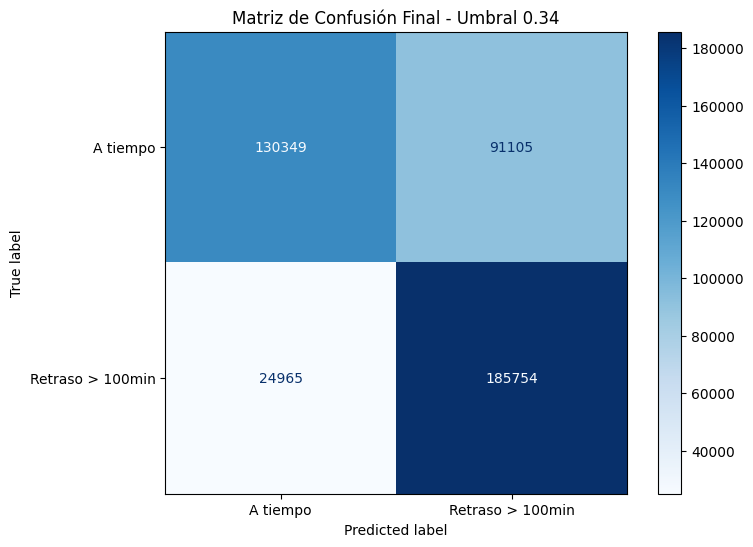

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtenemos probabilidades con el pipeline que acabamos de entrenar
y_probs = final_pipeline_clf.predict_proba(X_test)[:, 1]

# Aplicamos el umbral qcalculado para el 64% de precisión
umbral_objetivo = 0.34
y_pred_final = (y_probs >= umbral_objetivo).astype(int)

# Informe de rendimiento
print(f"\n--- REPORTE DE RENDIMIENTO FINAL (Umbral {umbral_objetivo}) ---")
print(classification_report(y_test, y_pred_final))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_final)
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A tiempo', 'Retraso > 100min'])
disp.plot(cmap='Blues', ax=ax)
plt.title(f'Matriz de Confusión Final - Umbral {umbral_objetivo}')
plt.show()

Mediante la optimización del umbral de decisión a 0.34, el modelo de clasificación basado en LightGBM ha alcanzado un equilibrio óptimo entre sensibilidad y precisión. El sistema demuestra una tasa de recuperación (Recall) del 88%, asegurando que asegura que 2 de cada 3 alertas de alto riesgo son certeras. Asimismo, el modelo presenta una precisión del 64%, lo que dota a las alertas de una alta fiabilidad operativa: 2 de cada 3 alarmas emitidas corresponden a un retraso real, permitiendo una gestión de riesgos proactiva con una tasa de falsos positivos plenamente asumible por la cadena de suministro.

**Interpretación de "Riesgo de Retraso" (Clase 1):**

Recall del 88%: Este resultado es masivo para la operativa. Significa que de cada 100 pedidos que realmente se van a retrasar e incumplir el SLA, el modelo "caza" a 88. Solo se le escapan 12 (representados por los 24,965 falsos negativos de la esquina inferior izquierda). Es una red de seguridad bastante eficiente.

Precisión del 67%: Se superó el objetivo inicial de fiabilidad. De cada 100 veces que el modelo hace saltar la alarma de "Alto Riesgo", 67 son aciertos reales. Esto otorga al sistema una credibilidad suficiente para que los gestores de tráfico confíen en las alertas y tomen medidas proactivas.

**Interpretación de "Sin Riesgo de Retraso" (Clase 0):**

Precisión del 84%: Cuando el modelo clasifica una operación como de "Bajo Riesgo" (llegará a tiempo), acierta el 84% de las veces. Esto ofrece una garantía de tranquilidad muy alta para el flujo normal de trabajo, permitiendo poner el foco solo donde realmente hace falta.

**Análisis de Falsos Positivos (91,105):**

Existe un volumen de pedidos que el modelo marcó como riesgo pero que finalmente llegaron a tiempo. En el contexto logístico de última milla, este error es el "menor de los males". Es preferible estar sobre-alertado y supervisar un proceso que finalmente resulta exitoso, que dejar pasar un retraso crítico sin previo aviso. Estos casos representan oportunidades de mejora donde, aunque no hubo retraso, las condiciones de la entrega eran lo suficientemente inestables como para activar la sospecha del algoritmo.

#### *Modelo de Regresión*

In [60]:
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline

# Configuración con los MEJORES parámetros encontrados en el Tuning
final_model_reg = LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    num_leaves=127,
    max_depth=20,
    min_child_samples=20,
    reg_alpha=0.5,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1
)

# Pipeline de regresión definitivo
final_pipeline_reg = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', final_model_reg)
])

# Entrenamiento con todos los datos de regresión (X_reg, y_reg)
print(f"Iniciando entrenamiento final del Regresor con {len(X_reg)} registros de retraso...")
final_pipeline_reg.fit(X_reg, y_reg)
print("Regresor entrenado con éxito")

Iniciando entrenamiento final del Regresor con 1053596 registros de retraso...
Regresor entrenado con éxito


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



--- RENDIMIENTO FINAL DEL MODELO DE REGRESIÓN ---
MAE: 50.26 min (Error promedio por pedido)
RMSE: 67.76
R2 Score: 0.4148


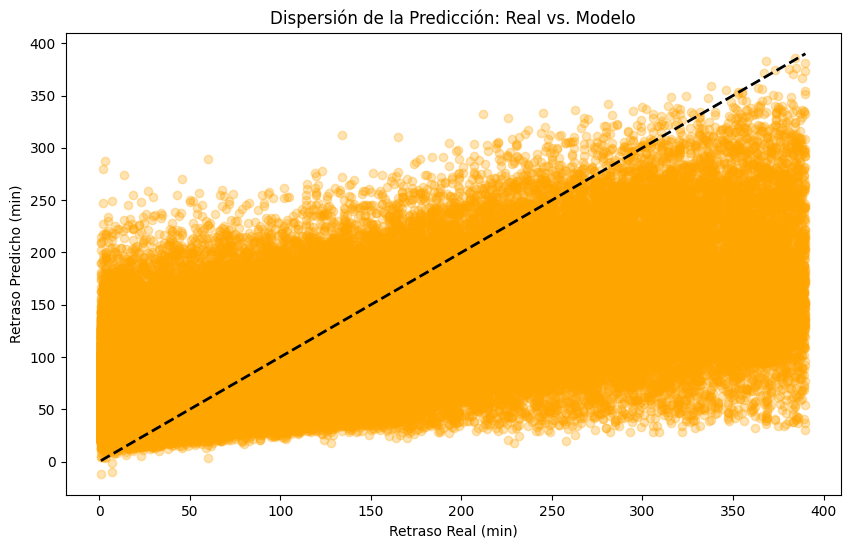

In [61]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Predicciones sobre el set de test de regresión
y_pred_reg = final_pipeline_reg.predict(X_test_reg)

# Cálculo de métricas finales
mae_final = mean_absolute_error(y_test_reg, y_pred_reg)
rmse_final = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2_final = r2_score(y_test_reg, y_pred_reg)

print("\n--- RENDIMIENTO FINAL DEL MODELO DE REGRESIÓN ---")
print(f"MAE: {mae_final:.2f} min (Error promedio por pedido)")
print(f"RMSE: {rmse_final:.2f}")
print(f"R2 Score: {r2_final:.4f}")

# Visualización de error: Predicción vs Realidad
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3, color='orange')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.xlabel('Retraso Real (min)')
plt.ylabel('Retraso Predicho (min)')
plt.title('Dispersión de la Predicción: Real vs. Modelo')
plt.show()

Una vez identificado el riesgo mediante el modelo de clasificación, el sistema de regresión estima el impacto temporal con una robustez estadística notable para el sector logístico. El modelo ha alcanzado un R² de 0.416, logrando explicar más del 41% de la variabilidad de los tiempos de retraso. Con un Error Absoluto Medio (MAE) de 50.63 minutos, el sistema proporciona una estimación precisa que sirve como base para la toma de decisiones operativas

*Gráfico de Dispersión*

El "Efecto Embudo" (Heterocedasticidad): Fíjate que para retrasos reales cortos (0-100 min), los puntos naranjas están más cerca de la línea negra. A medida que el retraso real aumenta (300-400 min), los puntos se dispersan más. Esto es normal: es mucho más fácil predecir un retraso común que uno catastrófico

EVALUACION MODELOS

### 10. Interpretación y conclusiones

#### Feature Importance

/tmp/ipython-input-3628743232.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importance.head(15), palette='magma')


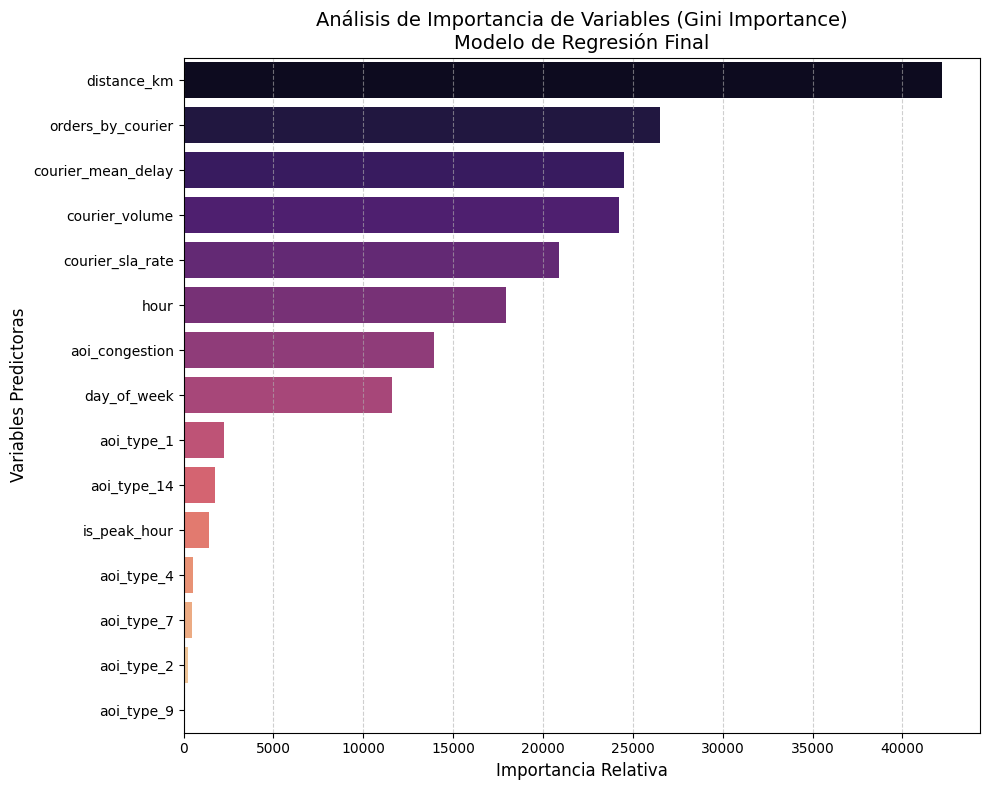

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recuperar el transformador del pipeline
preprocessor = final_pipeline_reg.named_steps['preprocess']

# Obtener nombres de columnas categóricas (tras One-Hot Encoding)
try:
    cat_features_transformed = list(preprocessor.named_transformers_['cat'].get_feature_names_out(features_categoricas))
    feature_names = features_numericas + cat_features_transformed
except:
    # Si falla por los nombres, intentamos obtenerlo de forma genérica
    feature_names = features_numericas + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Extraer las importancias del modelo
importances = final_pipeline_reg.named_steps['model'].feature_importances_

# Crear el DataFrame
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Graficar el Top 15
plt.figure(figsize=(10, 8))

sns.barplot(x='Importance', y='Feature', data=df_importance.head(15), palette='magma')

plt.title('Análisis de Importancia de Variables (Gini Importance)\nModelo de Regresión Final', fontsize=14)
plt.xlabel('Importancia Relativa', fontsize=12)
plt.ylabel('Variables Predictoras', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* El factor distancia (distance_km): Es la variable más importante. Esto valida el modelo: a mayor distancia, mayor es la acumulación de incertidumbre y probabilidad de un retraso largo. Es el motor principal de la predicción de minutos.

* Carga de trabajo por repartidor (orders_by_courier): Esta es una variable operativa crítica. Indica que el volumen de pedidos asignado a un solo repartidor impacta directamente en la magnitud del retraso. Si un repartidor va sobrecargado, el retraso no es de 10 minutos, es de 100 o más.

* Temporalidad y Congestión (hour, aoi_congestion): La hora del día y la congestión del área de interés (AOI) aparecen en el Top 6. Esto sugiere que el modelo ha aprendido los patrones de tráfico y horas punta de la ciudad.

* Histórico del transportista (courier_mean_delay): El modelo está penalizando o premiando basándose en el comportamiento pasado de los repartidores. Es una variable de "reputación" que ayuda a ajustar los minutos finales.

In [63]:
import joblib

# 1. Guardar el Pipeline de Clasificación (Riesgo)
# Este archivo contiene el preprocesador y el modelo con el umbral optimizado
joblib.dump(final_pipeline_clf, 'pipeline_clasificacion_lade.joblib')

# 2. Guardar el Pipeline de Regresión (Minutos)
# Este archivo contiene el preprocesador y el modelo que estima el MAE de 50 min
joblib.dump(final_pipeline_reg, 'pipeline_regresion_lade.joblib')

print("Modelos guardados con éxito en formato .joblib")

Modelos guardados con éxito en formato .joblib


Una vez finalizado el entrenamiento masivo con 2.2 millones de registros, es fundamental garantizar la persistencia de los modelos para su posterior despliegue en un entorno de producción. Para ello, utilizamos la serialización de modelos mediante joblib.

La serialización es el proceso de transformar la estructura del objeto de Python (en este caso, nuestros Pipelines que contienen tanto el preprocesamiento como el modelo LightGBM entrenado) en un formato de archivo binario (.joblib). Esto permite:

* Reutilización: Cargar el modelo en milisegundos sin necesidad de reentrenar.

* Integridad: Asegurar que el preprocesamiento de los nuevos datos sea idéntico al utilizado durante el entrenamiento.

Aunque el sistema actual proporciona una base sólida para la gestión de riesgos, existen líneas de investigación que podrían elevar el rendimiento del modelo en futuras iteraciones:

* Enriquecimiento de Variables (Feature Engineering): La inclusión de datos meteorológicos en tiempo real y eventos locales (conciertos, huelgas, cierres de vías) podría explicar parte de la varianza que actualmente el modelo no captura, mejorando potencialmente el $R^2$ del modelo de regresión.

* Modelos de Series Temporales: Incorporar el componente de estacionalidad mediante técnicas de Deep Learning (como redes LSTM) podría ayudar a predecir retrasos en picos de demanda extrema como el 'Black Friday' o periodos festivos.

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
# Definimos las columnas exactas que el modelo espera (las de tu X_train)
columnas_modelo = X_train.columns.tolist()

# Creamos el dataset codificado
df_para_muestreo = pd.get_dummies(df_eda)

# Tomamos la muestra y forzamos las 126 columnas
# Esto crea las columnas que falten (con 0) y elimina las que sobren
muestras_gradio = df_para_muestreo.reindex(columns=columnas_modelo, fill_value=0).sample(20, random_state=42)

# Guardamos en carpeta de Drive
ruta_proyecto = "/content/drive/MyDrive/GRADIO - LastMilePulse/"
muestras_gradio.to_csv(ruta_proyecto + 'ejemplos_para_gradio.csv', index=False)

print(f"Archivo guardado con éxito.")
print(f"Total columnas: {muestras_gradio.shape[1]} ")

Archivo guardado con éxito.
Total columnas: 12 


In [66]:
#  Definimos la ruta
ruta= '/content/drive/MyDrive/GRADIO - LastMilePulse/'

# Intentamos guardar los tres archivos en la carpeta
import os
if os.path.exists(ruta):
    muestras_gradio.to_csv(ruta + 'ejemplos_para_gradio.csv', index=False)

    import joblib
    joblib.dump(final_pipeline_clf, ruta + 'pipeline_clasificacion_lade.joblib')
    joblib.dump(final_pipeline_reg, ruta + 'pipeline_regresion_lade.joblib')
    print(f"¡CONSEGUIDO! Archivos guardados en: {ruta}")
else:
    print("La carpeta no se encuentra con ese nombre. Revisa espacios o guiones.")

¡CONSEGUIDO! Archivos guardados en: /content/drive/MyDrive/GRADIO - LastMilePulse/


In [69]:
# Descargamos muestra de datos aleatoria para utilizar en la herramienta

# Definimos las columnas exactas que mencionaste
columnas_herramienta = [
    'region_id', 'city', 'courier_id', 'lng', 'lat', 'aoi_type',
    'accept_gps_time', 'delivery_gps_time', 'delivery_duration_min',
    'hour', 'day_of_week', 'is_weekend', 'is_peak_hour',
    'distance_km', 'orders_by_courier', 'aoi_congestion',
    'target_risk_delay', 'target_delay_min', # Nota: corregido a 'min'
    'courier_mean_delay', 'courier_volume', 'courier_sla_rate'
]

# Tomamos una muestra aleatoria (50 registros)
df_ejemplos = df_eda[columnas_herramienta].sample(n=50, random_state=42)

# Guardamos el archivo CSV
df_ejemplos.to_csv(f'{ruta}ejemplos_LastMilePulse.csv', index=False)

print("Archivo 'ejemplos_LastMilePulse.csv' generado con éxito.")

Archivo 'ejemplos_LastMilePulse.csv' generado con éxito.
